In [1]:
import mountaincar
import numpy as np
import starter as st
import matplotlib.pyplot as plt
%matplotlib inline

### First we perform some quick tests to see if the number of neurons in the input layer is critical for the performance of the agent.

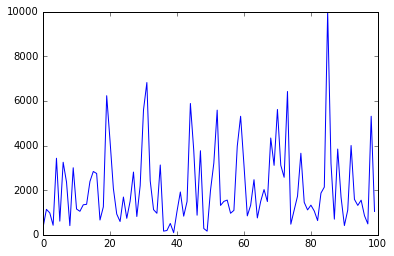

In [17]:
grid_shape = (500, 500)
W = np.ones((3, np.prod(grid_shape)))
net = st.Network(grid_shape=grid_shape, W=W)
agent = st.Agent(net=net)
learning_curve = agent.learn()
plt.plot(learning_curve)
plt.show()

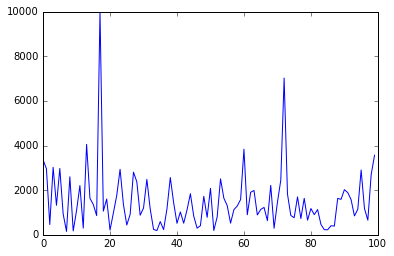

In [3]:
grid_shape = (360, 60)
W = np.ones((3, np.prod(grid_shape)))
net = st.Network(grid_shape=grid_shape, W=W)
agent = st.Agent(net=net)
learning_curve = agent.learn()
plt.plot(learning_curve)
plt.show()

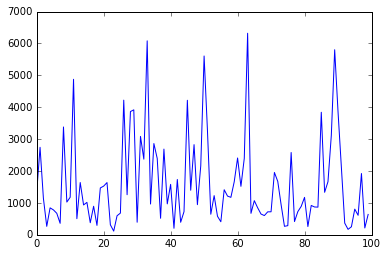

In [6]:
grid_shape = (20, 20)
W = np.ones((3, np.prod(grid_shape)))
net = st.Network(grid_shape=grid_shape, W=W)
agent = st.Agent(net=net)
learning_curve = agent.learn()
plt.plot(learning_curve)
plt.show()

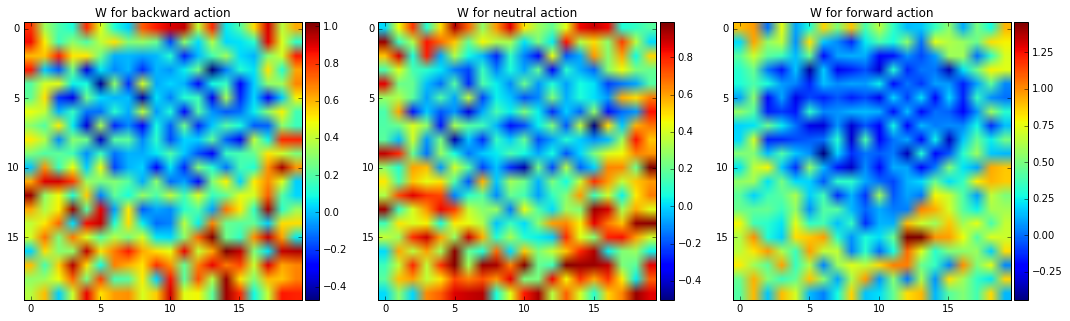

In [28]:
st.plot_weights(agent)
plt.show()

# 1. Policy vs. state

Here we test what are the most likely actions after successive trials of learning. Intuitively, the car should roughly learn to accelerate to the left when its speed is large to the left, and accelerate to the right when its speed is large to the right. Both these actions will increase the car's momentum and contribute for it being able to reach its goal in the x = 0 column in the state space.

In [23]:
agent = st.Agent()
n_trials = 25 # Increment in the number of trials for each figure
total_trials = 0

* Initial vector field

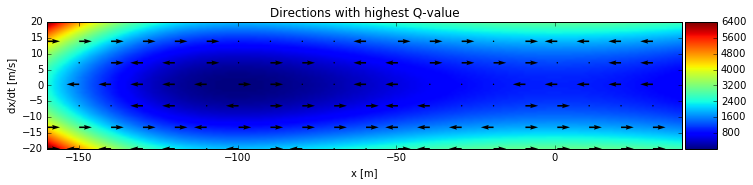

In [24]:
fig, _ = st.plot_vector_field(agent)
fig.savefig('figs/Q_' + str(total_trials) + '.pdf', bbox_inches='tight')
plt.show()

* Learn for a couple of trials 

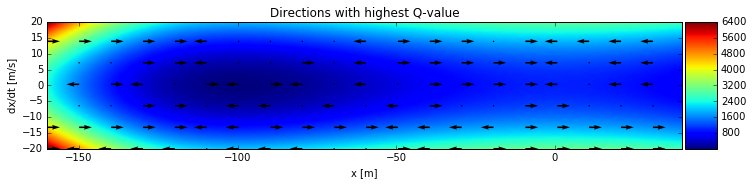

In [25]:
agent.learn(n_trials=n_trials)
fig, _ = st.plot_vector_field(agent)
total_trials += n_trials
fig.savefig('figs/Q_' + str(total_trials) + '.pdf', bbox_inches='tight')
plt.show()

* Learn for a couple of trials 

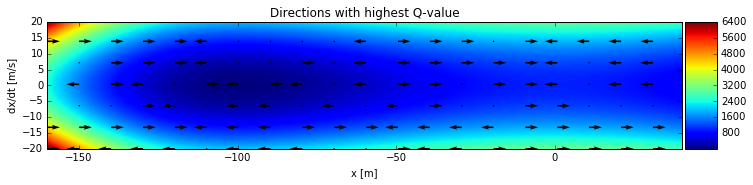

In [26]:
agent.learn(n_trials=n_trials)
fig, _ = st.plot_vector_field(agent)
total_trials += n_trials
fig.savefig('figs/Q_' + str(total_trials) + '.pdf', bbox_inches='tight')
plt.show()

* Learn for a couple of trials 

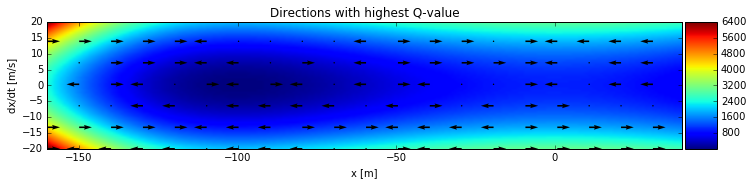

In [27]:
agent.learn(n_trials=n_trials)
fig, _ = st.plot_vector_field(agent)
total_trials += n_trials
fig.savefig('figs/Q_' + str(total_trials) + '.pdf', bbox_inches='tight')
plt.show()

***Warning: the experiments below might take a very long time to execute***

# 2. Escape latency vs. trial number (i.e., learning curve)

* First using default values (see docs or source code for more info)

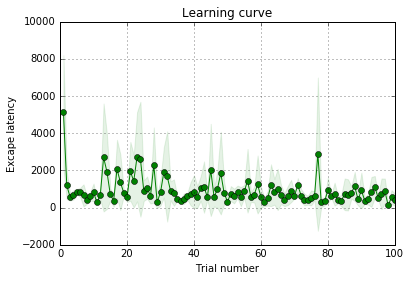

In [4]:
learning_curves = st.batch_agents()
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/default_vals.pdf', bbox_inches='tight')
plt.show()

# 3. Exploration vs. exploitation (temperature parameter)

Here we test the influence of the temperature exploration parameter \tau on the learning curves of the agents.

* $\tau = 1$

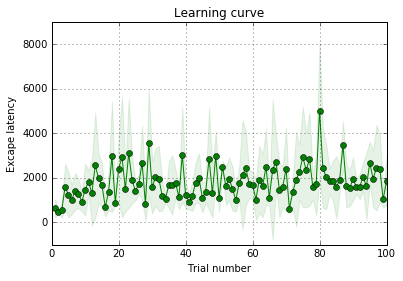

In [5]:
learning_curves = st.batch_agents(temp=1)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/tau=1.pdf', bbox_inches='tight')
plt.show()

* $\tau = \infty$

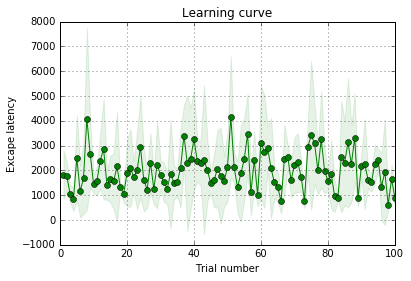

In [10]:
learning_curves = st.batch_agents(temp=np.inf)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/tau=inf.pdf', bbox_inches='tight')
plt.show()

* $\tau = 0$

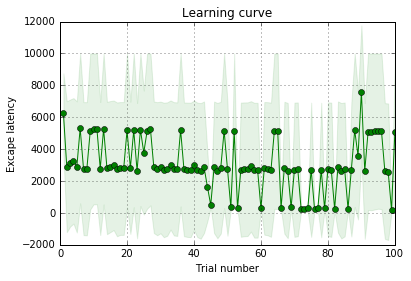

In [9]:
learning_curves = st.batch_agents(temp=0)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/tau=0.pdf', bbox_inches='tight')
plt.show()

* Time decaying $\tau$

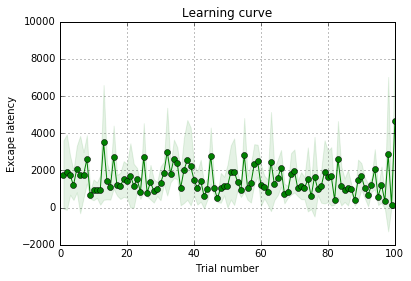

In [9]:
# Linear decay
learning_curves = st.batch_agents(temp=1, temp_fun=st.lin_temp_decay)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/tau=1_lin_decay.pdf', bbox_inches='tight')
plt.show()

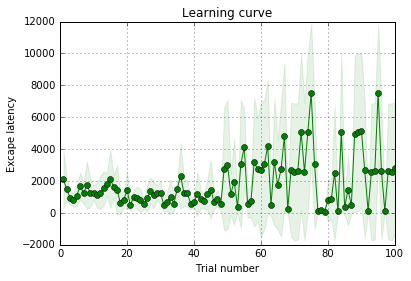

In [8]:
# Exponential decay
learning_curves = st.batch_agents(temp=1, temp_fun=st.exp_temp_decay)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/tau=1_exp_decay.pdf', bbox_inches='tight')
plt.show()

# 4. Effect of eligibility trace decay rate on learning curves

Here we test the influence of the eligibility trace decay rate \lambda on the learning curves of the agents.

* $\lambda = 0.95$

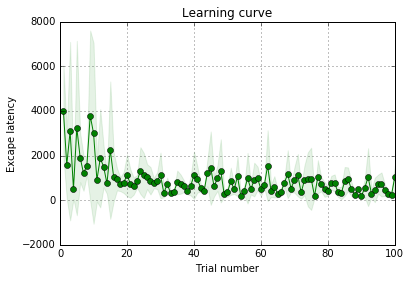

In [6]:
learning_curves = st.batch_agents(el_tr_rate=0.95)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/el_tr_rate=p95.pdf', bbox_inches='tight')
plt.show()

* $\lambda = 0$

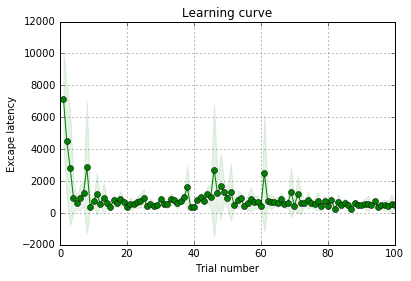

In [5]:
learning_curves = st.batch_agents(el_tr_rate=0.0)
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/el_tr_rate=0.pdf', bbox_inches='tight')
plt.show()

# 5. Effect of the initialization of weights on learning curves

Here we test the influence of the initialization of weights of the neural network on the learning curves of the agents.

* $w_{a_i, j} = 0, \forall i,j$

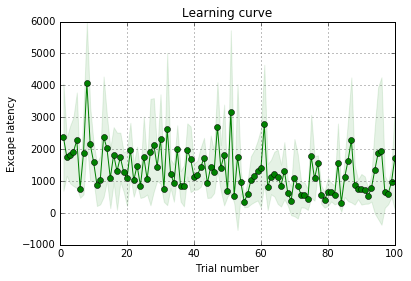

In [3]:
learning_curves = st.batch_agents(W=np.zeros((3, 20*20)))
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/w=0.pdf', bbox_inches='tight')
plt.show()

* $w_{a_i, j} = 1, \forall i,j$

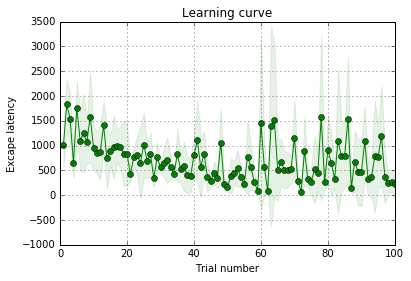

In [4]:
learning_curves = st.batch_agents(W=np.ones((3, 20*20)))
fig, _ = st.plot_learning_curves(learning_curves)
fig.savefig('figs/w=1.pdf', bbox_inches='tight')
plt.show()